In [1]:
library(datasets)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [91]:
# class -> factor numeric 등등 구별
# typeof -> fator가 integer 값인지 아닌지

#종속변수 독립변수 분리
# 전부 다 사용했을 때 군집 형성이 좋지않다 다 사용하기보다는 petal.length / petal.width로 만
# X = iris[c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width')]
X = iris[c('Petal.Length', 'Petal.Width')]
label = iris[c('Species')]

In [92]:
normalize <- function(m) {
    (m - min(m))/(max(m)-min(m))
}
X <- apply(X,2,normalize)

[1] 28.3683532  5.1764636  1.7018747  1.1588793  0.8535683  0.6795298
 [7]  0.5651273  0.4858085  0.4132668  0.3660777  0.3301532  0.3014104
[13]  0.2762660  0.2499645  0.2357183

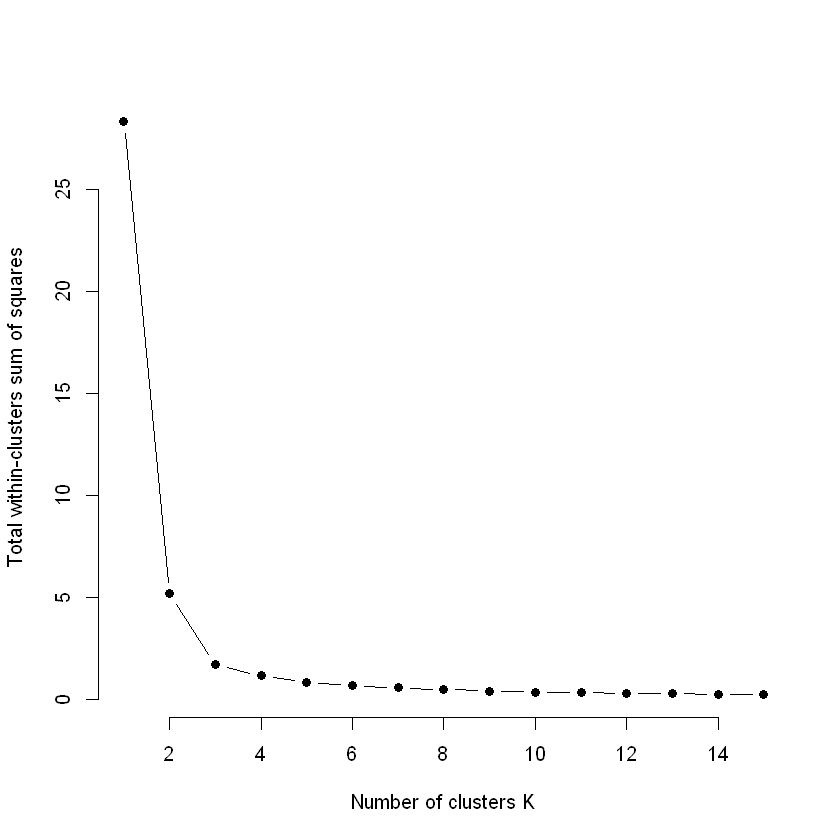

In [93]:
#elbow method 를 통한 k 결정하기
set.seed(123)

k.max <- 15
data <- X
wss <- sapply(1:k.max, function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
wss

plot(1:k.max, wss,type="b", pch = 19, frame = FALSE, xlab="Number of clusters K",ylab="Total within-clusters sum of squares")

## k == 3 이 적절하다는 결과를 획득

In [94]:
irisCluster <- kmeans(X, 3, nstart = 20)
irisCluster

K-means clustering with 3 clusters of sizes 50, 48, 52

Cluster means:
  Petal.Length Petal.Width
1   0.07830508  0.06083333
2   0.77401130  0.81510417
3   0.55867014  0.51041667

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

Within cluster sum of squares by cluster:
[1] 0.1369325 0.8858123 0.6791299
 (between_SS / total_SS =  94.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [95]:
table(irisCluster$cluster, label$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0          2        46
  3      0         48         4

In [96]:
library("ggplot2")

In [97]:
irisCluster$cluster <- as.factor(irisCluster$cluster)
irisCluster$cluster <- ordered(irisCluster$cluster, levels = c(1,2,3), labels=c("setosa", "versicolor", "virginica"))

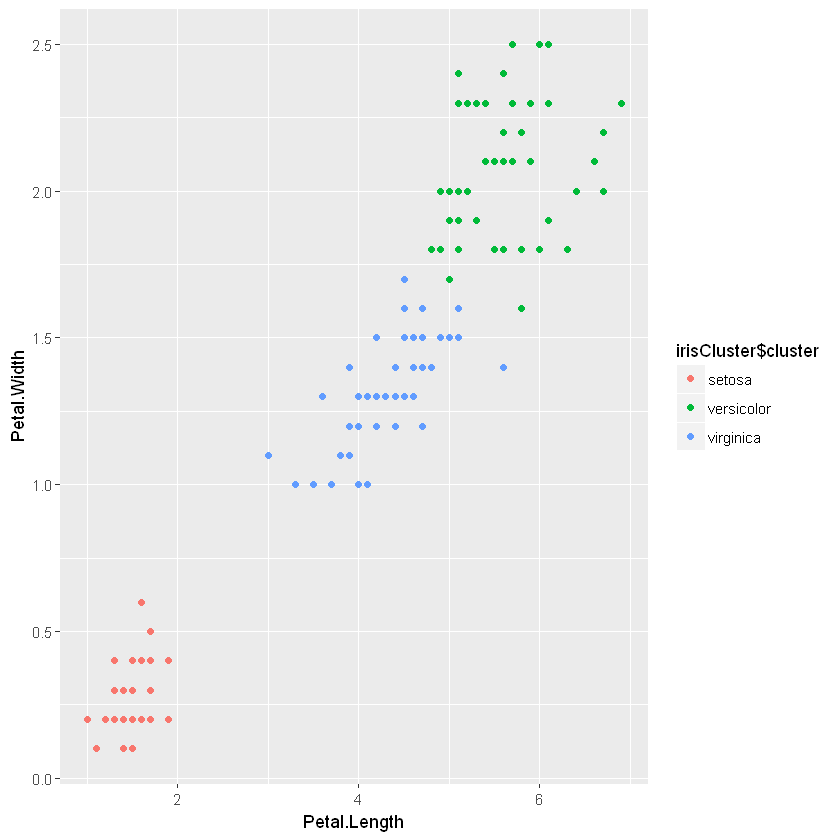

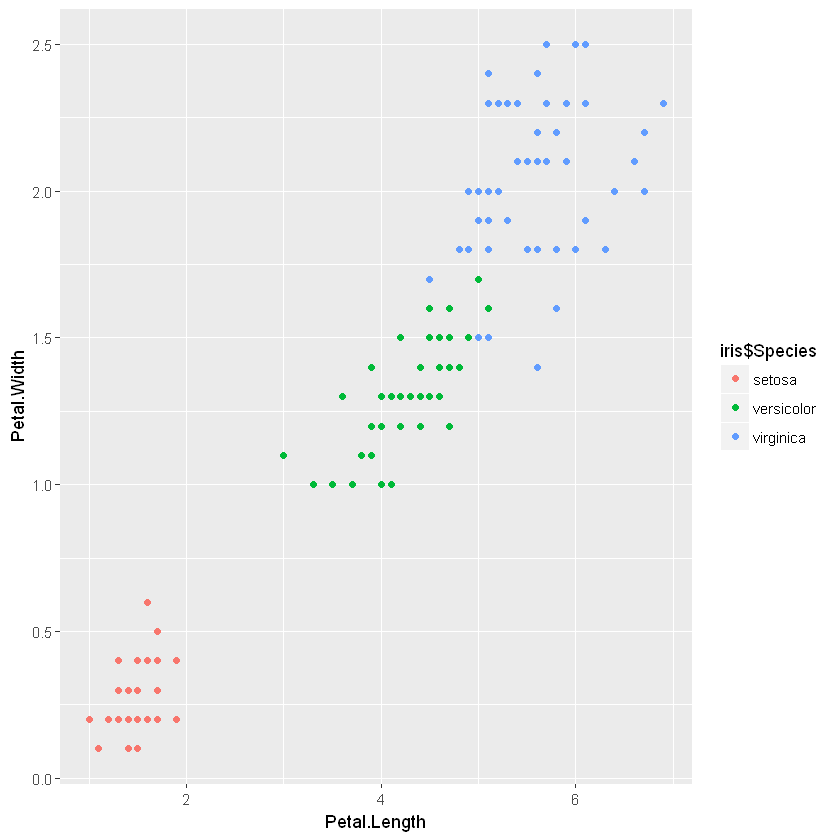

In [98]:
ggplot(iris, aes(Petal.Length, Petal.Width, color = irisCluster$cluster)) + geom_point()
ggplot(iris, aes(Petal.Length, Petal.Width, color = iris$Species)) + geom_point()